**Cluster Validation**


Aim is to check if the number of clusters used is good or not for the model

**Methods used**
- Elbow Method
- Silhoutte score Method

**ELBOW METHOD**

This is the method in which the plot is drawn with Cluster count Vs Squared Sum Error and the bend in the plotted line is accepted as the optimum number of cluster count.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [3]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
Y = dataset.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Scaling of the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
scaledX = sc.transform(X)
scaledX.shape

(150, 4)

In [7]:
# Clustering of the datapoints using KMeans 
from sklearn.cluster import KMeans

In [8]:
clusters = [2,3,4,5,6,7,8,8,9,10]
sse = []
for cluster_count in clusters:
  km = KMeans(n_clusters=cluster_count,random_state=101)
  km.fit(scaledX)

  sse.append(km.inertia_)

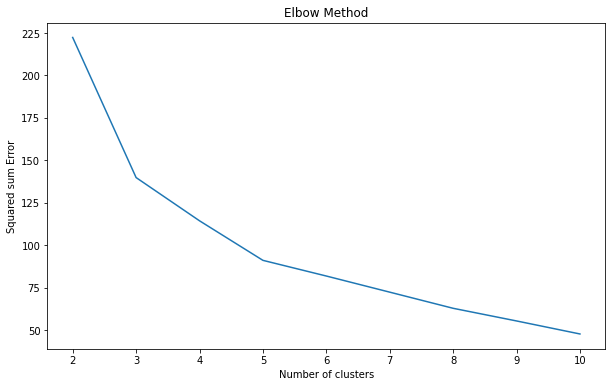

In [9]:
# Plot for Elbow Method " SSE vs Cluster count"

plt.figure(figsize=(10,6))
plt.xlabel("Number of clusters")
plt.ylabel("Squared sum Error")
plt.title("Elbow Method")
plt.plot(clusters,sse)


From the above plot, we can see there is bend at cluster count of 2 and 3.

**SILHOUTTE SCORE METHOD**

S = (A - B)/ Max(A,B)

- S = Silhoutte Cofficient
- A = Avg distance of the datapoint from other points in the cluster
- B = Avg distance of the datapoint from other points in clusters to which the datapoint doesnot belong.

Distance is measured in Euclidean

In [10]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [13]:
#for count in clusters:
silscore = []
for count in clusters:
  km = KMeans(n_clusters=count,random_state=101)
  km.fit(scaledX)
  sil_score = silhouette_score(scaledX, km.labels_,metric="euclidean")
  silscore.append(sil_score)
  print(f'silhoutte score for cluster {count} is {sil_score}')

silhoutte score for cluster 2 is 0.5817500491982808
silhoutte score for cluster 3 is 0.45994823920518635
silhoutte score for cluster 4 is 0.38193193551552046
silhoutte score for cluster 5 is 0.3413927532719825
silhoutte score for cluster 6 is 0.34580326351890284
silhoutte score for cluster 7 is 0.3441009905453241
silhoutte score for cluster 8 is 0.33563879212143244
silhoutte score for cluster 8 is 0.33563879212143244
silhoutte score for cluster 9 is 0.3313719551059903
silhoutte score for cluster 10 is 0.34911400640720786


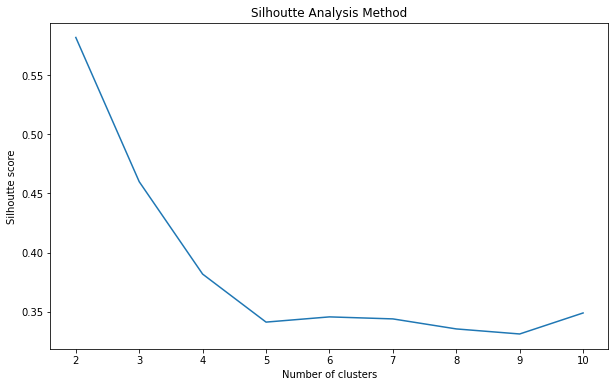

In [14]:
# Plot of silhoutte score vs cluster count

plt.figure(figsize=(10,6))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte score")
plt.title("Silhoutte Analysis Method")
plt.plot(clusters,silscore)

As the cluster value of 2 is having high Silhoutte score, the optimal number of cluster is 2 